Problem Statement 

Data Set Information:
Whether to give loan to a person or not based on the information 

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
loanData=pd.read_csv('loan_prediction.csv.txt')
loanData


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
loanData.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
loanData['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [5]:
loanData['Credit_History'].unique()

array([ 1.,  0., nan])

In [6]:
loanData['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [7]:
loanData.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
#For categorical features  are  # workclass,occupation,native-country
# for each column, get value counts in decreasing order and take the index (value) of most common class
loanData['Gender']= loanData.apply(lambda x: loanData['Gender'].fillna(loanData['Gender'].value_counts().index[0]))
loanData['Married']= loanData.apply(lambda x: loanData['Married'].fillna(loanData['Married'].value_counts().index[0]))
loanData['Dependents']= loanData.apply(lambda x: loanData['Dependents'].fillna(loanData['Dependents'].value_counts().index[0]))
loanData['Self_Employed']= loanData.apply(lambda x: loanData['Self_Employed'].fillna(loanData['Self_Employed'].value_counts().index[0]))

In [9]:
loanData['LoanAmount']= loanData['LoanAmount'].fillna(loanData['LoanAmount'].astype(float).mean())
loanData['Loan_Amount_Term']= loanData['Loan_Amount_Term'].fillna(loanData['Loan_Amount_Term'].astype(float).mean())
loanData['Credit_History']= loanData['Credit_History'].fillna(loanData['Credit_History'].astype(float).mean())

In [10]:
loanData['Loan_Amount_Term'].unique()

array([360., 120., 240., 342., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [11]:
# loanData['Loan_Amount_Term']=loanData.apply(lambda x: loanData['Loan_Amount_Term'].fillna(loanData['Loan_Amount_Term'].mean()))
# loanData['Credit_History']=loanData.apply(lambda x: loanData['Credit_History'].fillna(loanData['Credit_History'].mean()))

In [12]:
loanData.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
loanData.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [14]:
# Lets Check Outliers in the Dataset 
# IQR score technique to remove Outliers 
Q1 = loanData.quantile(0.25)
Q3 = loanData.quantile(0.75)
IQR = Q3 - Q1
print(IQR.shape)
loanData = loanData[~((loanData < (Q1-1.5 * IQR)) |(loanData > (Q3 + 1.5 * IQR))).any(axis=1)]
loanData.shape


(5,)


(350, 13)

In [15]:
loanData

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.000000,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.000000,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y


In [16]:
# Label Encoding for Object Column workclass marital-status ,occupation ,race ,relationship, native-country,50K
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
loanData['Gender'] = labelencoder.fit_transform(loanData['Gender'])
loanData['Married'] = labelencoder.fit_transform(loanData['Married'])
loanData['Dependents'] = labelencoder.fit_transform(loanData['Dependents'])
loanData['Education'] = labelencoder.fit_transform(loanData['Education'])
loanData['Self_Employed'] = labelencoder.fit_transform(loanData['Self_Employed'])
loanData['Property_Area'] = labelencoder.fit_transform(loanData['Property_Area'])
loanData['Loan_Status'] = labelencoder.fit_transform(loanData['Loan_Status'])

loanData

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,LP002964,1,1,2,1,0,3987,1411.0,157.000000,360.0,1.0,0,1
608,LP002974,1,1,0,0,0,3232,1950.0,108.000000,360.0,1.0,0,1
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1


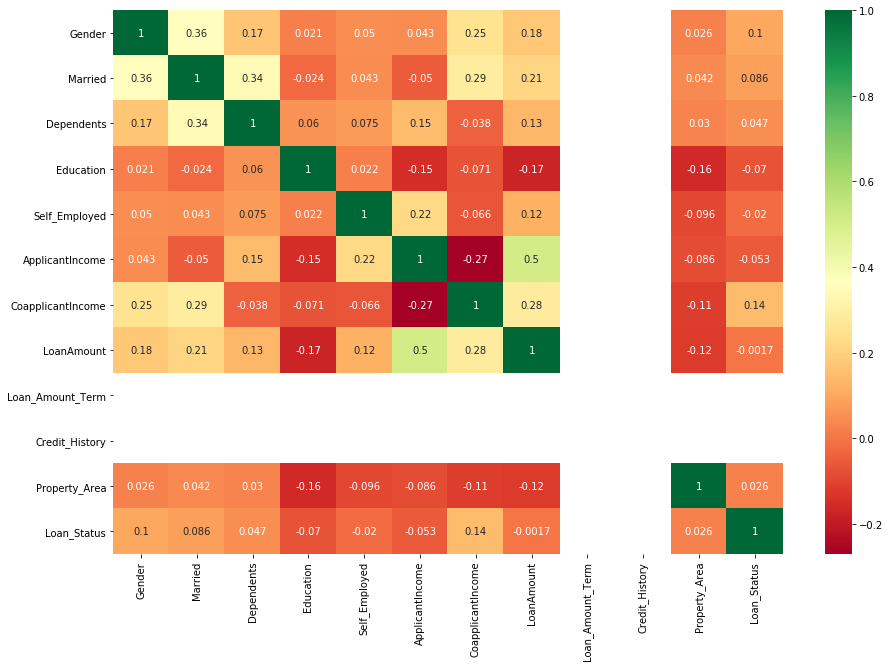

In [17]:
# Correlation of EmpData
plt.figure(figsize=(15,10))
sns.heatmap(data=loanData.corr(),annot=True,cmap="RdYlGn")

In [18]:
loanData.keys()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [19]:
# drop the columns negtively corrleated columns 
loanData.drop(['Loan_Amount_Term','Credit_History','LoanAmount'],axis=1,inplace=True)


In [20]:
loanData.skew()

Gender              -1.647963
Married             -0.560033
Dependents           1.078344
Education            1.462332
Self_Employed        2.480412
ApplicantIncome      1.147253
CoapplicantIncome    0.833702
Property_Area        0.034697
Loan_Status         -1.647963
dtype: float64

In [21]:
# Log Trasformation
x=loanData
x['Self_Employed']=np.log(loanData['Self_Employed']+1)


In [22]:
x=x.drop(['Loan_Status'],axis=1)
x=x.drop(['Loan_ID'],axis=1)

In [23]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Property_Area
0,1,0,0,0,0.000000,5849,0.0,2
1,1,1,1,0,0.000000,4583,1508.0,0
2,1,1,0,0,0.693147,3000,0.0,2
3,1,1,0,1,0.000000,2583,2358.0,2
4,1,0,0,0,0.000000,6000,0.0,2
...,...,...,...,...,...,...,...,...
607,1,1,2,1,0.000000,3987,1411.0,0
608,1,1,0,0,0.000000,3232,1950.0,0
609,0,0,0,0,0.000000,2900,0.0,0
611,1,1,1,0,0.000000,8072,240.0,2


In [24]:
y=loanData['Loan_Status']
y=np.array(y).reshape(-1,1)

In [25]:
print(x.shape)
print(y.shape)

(350, 8)
(350, 1)


In [26]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=42)
# default random random_state=42


In [27]:
# using maxr2_score function will findout random_state

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

def maxr2_score(regr,x,y):
    max_r_score=0
    final_r_state=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
#         print("r2 score corresponding to",r_state," is " ,r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to",final_r_state," is ",max_r_score)
    return final_r_state

# Define the Classification Model

In [28]:
# import Libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)


from sklearn.ensemble import RandomForestClassifier
#  Cross Validation Libraries 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

KNN=KNeighborsClassifier(n_neighbors=6)
sv=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()
Rf=RandomForestClassifier(n_estimators = 1000, random_state = 1)
SGD=SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)

In [29]:
models=[]
models.append(("KNeighborsClassifier",KNN))
models.append(("SVC",sv))
models.append(("LogisticRegression",LR))
models.append(("DecisionTreeClassifier",DT))
models.append(("GaussianNB",GNB))
models.append(("SGDClassifier",SGD))
models.append(("RandomForestClassifier",Rf))


*********** KNeighborsClassifier ************


max r2 score corresponding to 99  is  0.19540229885057492


random state value = 99
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')


Accuracy_score=  0.8831168831168831


Cross_Val_Score= 0.799626517273576


roc_auc_score= 0.6929487179487179


classification_report
               precision    recall  f1-score   support

           0       0.71      0.42      0.53        12
           1       0.90      0.97      0.93        65

   micro avg       0.88      0.88      0.88        77
   macro avg       0.81      0.69      0.73        77
weighted avg       0.87      0.88      0.87        77



[[ 5  7]
 [ 2 63]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********** SVC ************


max r2 score corresponding to 58  is  0.20634920634920617


random state value = 58
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.

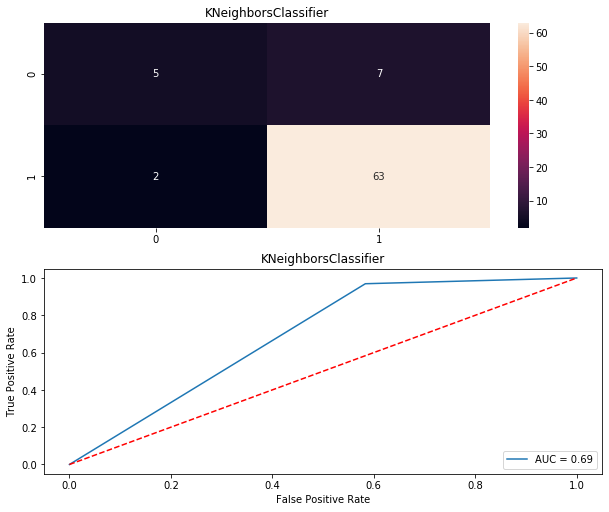

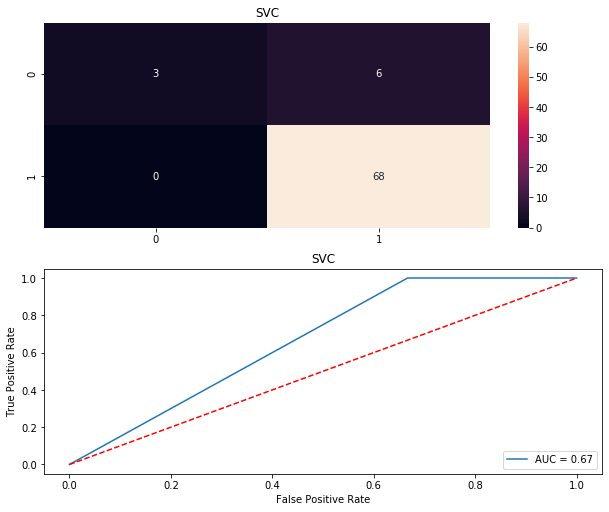

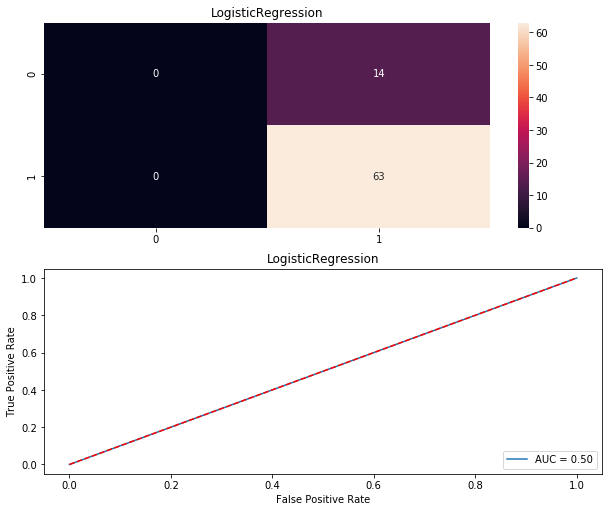

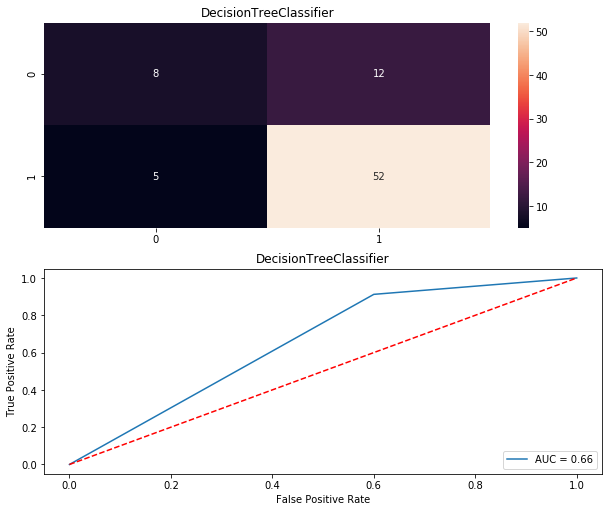

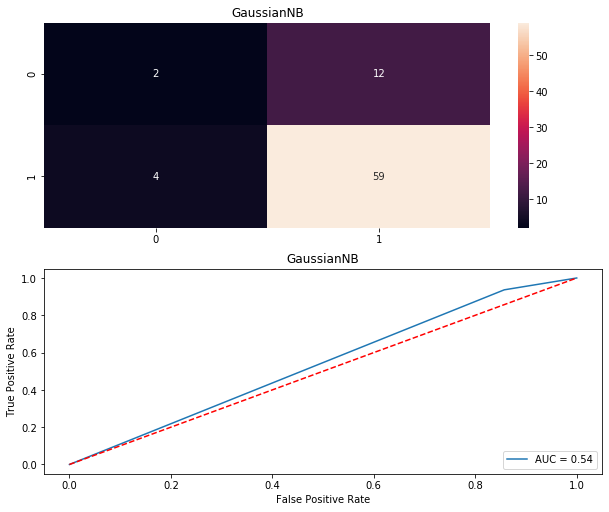

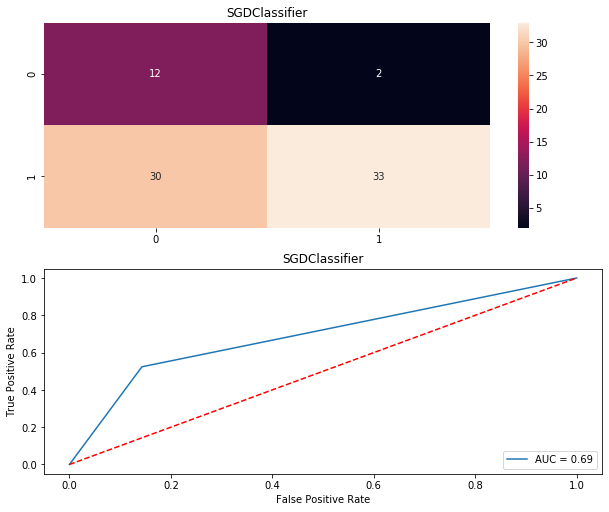

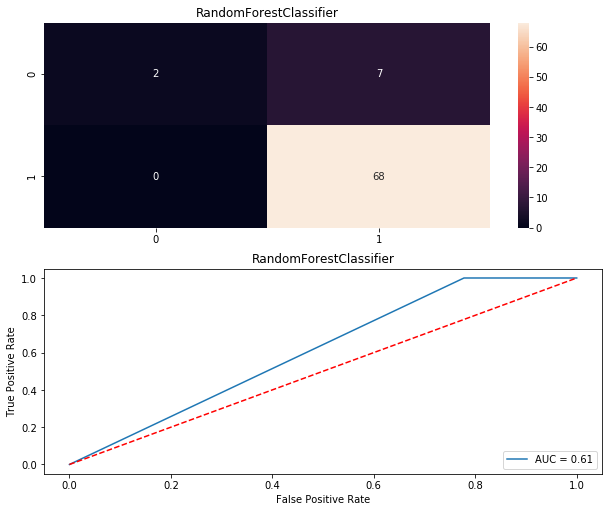

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.preprocessing import StandardScaler
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('***********',name,'************')
    print('\n')
    r_state=maxr2_score(model,x,y)
    print('\n')
    print('random state value =',r_state)
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
    
    
    
    
    
    
    
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score= ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_Val_Score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')
     


In [31]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_Score':cvs,'ROC_Auc_Curve':rocscore})
result

,Model,Accuracy_score,Cross_val_Score,ROC_Auc_Curve
0,KNeighborsClassifier,88.311688,79.962652,69.294872
1,SVC,92.207792,82.870215,66.666667
2,LogisticRegression,81.818182,81.734827,50.000000
3,DecisionTreeClassifier,77.922078,74.211951,65.614035
4,GaussianNB,79.220779,77.986461,53.968254
5,SGDClassifier,58.441558,81.734827,69.047619
6,RandomForestClassifier,90.909091,79.652661,61.111111


In [32]:
# Saving the Model with MAX Accuracy score value 
from sklearn.externals import joblib
joblib.dump(SVC,'LoanPrediction_Model.obj')
OuModel=joblib.load('LoanPrediction_Model.obj')


# Conclusion
    Preparing the classification model for data Loan Prediction
    we have been applied IQR score technique to remove Outliers
    we have been handled categorical and numeric null values 
    we have been applied Log Tranformation for Normal Distribution
    SVC	 Model has been achived max performance
